# KNN Classification

In [7]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [8]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

<b>load classification sample datasets

In [9]:
from sklearn import datasets
## comment the unneeded data sets

## classification data sets
X, y= datasets.load_breast_cancer(return_X_y=True,as_frame=True) # load the X,y data as dataframes
#X, y= datasets.load_iris(return_X_y=True,as_frame=True)
#X, y= datasets.load_wine(return_X_y=True,as_frame=True)

Information about the [breast-cancer](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) data set

In [10]:
# input variables
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# target variable is malignant or benign (binary label).
# let's check the distribution of labels
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

### train/test split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

### Knn_Classification

In [13]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

### Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the test labels.
The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

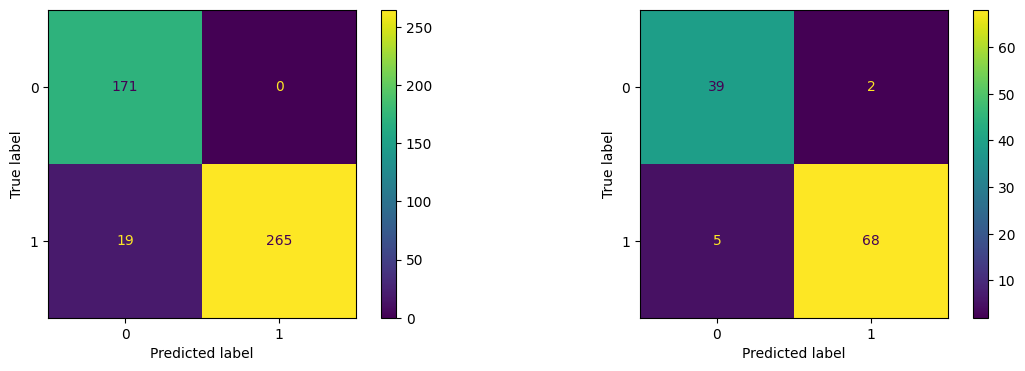

In [74]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
from sklearn.metrics import confusion_matrix

cm0 = confusion_matrix(y_train, y_pred_train)
ax0 = ConfusionMatrixDisplay(confusion_matrix = cm0)
ax0.plot(ax=ax[0])
# print(cm0)

cm1 = confusion_matrix(y_test, y_pred)
ax1= ConfusionMatrixDisplay(confusion_matrix = cm1)
ax1.plot(ax=ax[1])
 

Train results: 19 predictions where the model missed a malignant case and 0 cases where the model predicted cancer where the was none.
Test results: 5 predictions where the model misclassified malignant records and 2 cases where the model predicted a cancer where there was none.

### Performance Metrics

In [20]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [21]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.96,0.94
1,Precision,1.00,0.97
2,Recall,0.93,0.93


## AUC-ROC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system as the discrimination threshold is varied. It is a widely used evaluation metric for binary classification problems, especially when the classes are imbalanced.

The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. TPR is also known as sensitivity or recall, and it represents the proportion of actual positive cases that are correctly identified by the classifier. FPR is the proportion of actual negative cases that are incorrectly identified as positive by the classifier. Therefore, the ROC curve shows how well the classifier can distinguish between positive and negative cases, and how well it performs across a range of possible classification thresholds.

The ROC curve is created by plotting the TPR on the y-axis and the FPR on the x-axis. The curve is obtained by connecting the points corresponding to the different threshold settings of the classifier. A diagonal line from the bottom left corner to the top right corner represents the performance of a random classifier, and any classifier with a curve above this line is considered better than random. The closer the curve is to the top left corner, the better the classifier's performance. The area under the ROC curve (AUC) is a common metric used to quantify the performance of the classifier, with an AUC of 1.0 indicating perfect classification and an AUC of 0.5 indicating a random classifier.

In summary, the ROC curve provides a way to visualize and evaluate the performance of a binary classifier system across a range of possible threshold settings. It is a useful tool for comparing the performance of different classifiers, and for choosing an appropriate threshold setting based on the desired balance between TPR and FPR.

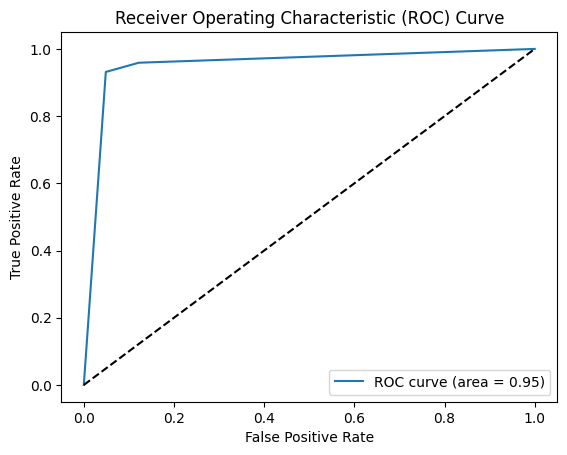

In [22]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
## probs
fpr, tpr, thresholds

(array([0.        , 0.04878049, 0.12195122, 1.        ]),
 array([0.        , 0.93150685, 0.95890411, 1.        ]),
 array([2. , 1. , 0.5, 0. ]))

<b> a simple example of calculating an ROC curve manually.<b>

Suppose we have a binary classification problem with 10 positive and 10 negative examples, and we have a classifier that produces continuous scores between 0 and 1. The scores for the positive examples are as follows:

[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]

The scores for the negative examples are as follows:

[0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

We can calculate the ROC curve as follows:

1. Sort the scores in descending order:
[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]

2.  Set the threshold.
3.  For each score in the sorted list, calculate the TPR and FPR for the current threshold. The TPR is the proportion of positive examples that are correctly classified as positive (i.e., true positives), and the FPR is the proportion of negative examples that are incorrectly classified as positive (i.e., false positives). Record these values for each score.

For example, if the threshold is set to 1 (i.e., all examples are classified as negative), the TPR is 0/10 = 0 and the FPR is 0/10 = 0. If the threshold is set to 0.9, the TPR is 1/10 = 0.1 and the FPR is 0/10 = 0. If the threshold is set to 0.8, the TPR is 2/10 = 0.2 and the FPR is 0/10 = 0. Continue this process for each score in the sorted list.

4. Plot the resulting TPR versus FPR for each threshold value. This gives us the ROC curve.
5. Calculate the AUC by numerically integrating the area under the ROC curve using a method such as the trapezoidal rule.